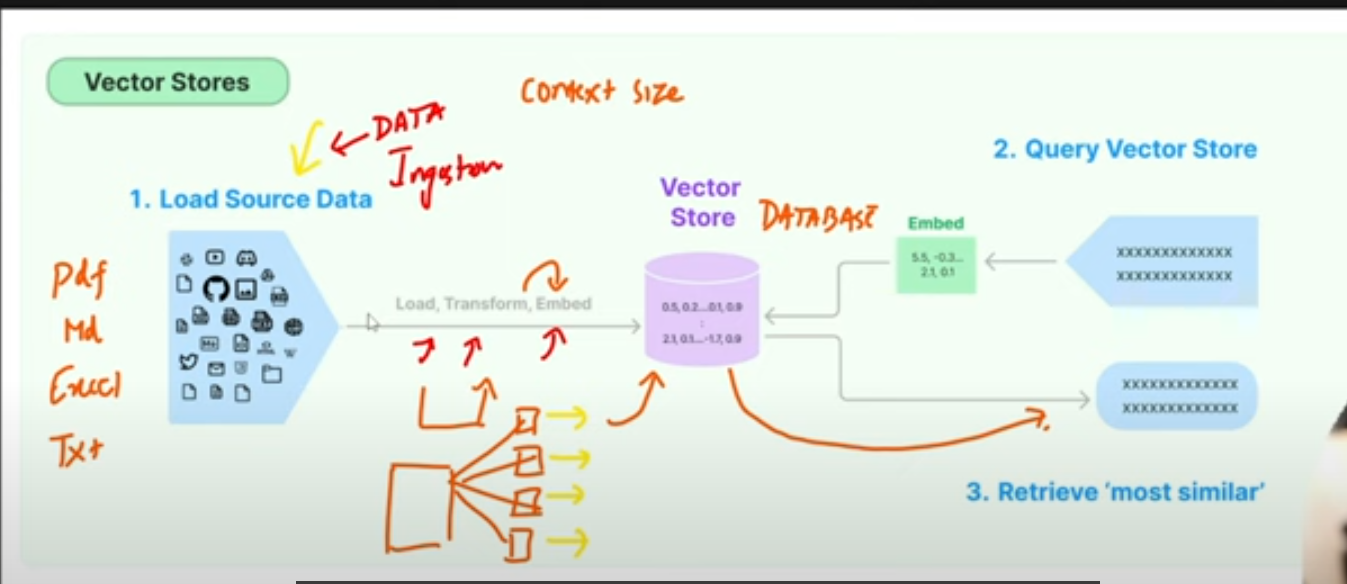
# LOAD Part

In [1]:
from langchain_community.document_loaders import TextLoader
loader = TextLoader("speech.txt")
text_documents=loader.load()
text_documents

[Document(page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\nâ€¦\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairness because we act without animus, not 

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

#os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')


True

In [2]:
# web based loader
from langchain_community.document_loaders import WebBaseLoader
import bs4

## load,chunk and index the content of the html page

loader=WebBaseLoader(web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
                     bs_kwargs=dict(parse_only=bs4.SoupStrainer(
                         class_=("post-title","post-content","post-header")

                     )))

text_documents=loader.load()

In [3]:
text_documents

[Document(page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final re

In [4]:
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader(file_path="attention.pdf")
docs=loader.load()

In [5]:
docs

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

---
# Transform

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents=text_splitter.split_documents(docs)
documents[:5]

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

---
# Vector Embedding

In [11]:
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import Chroma


## Chroma Vector database

db= Chroma.from_documents(documents[:20], OllamaEmbeddings(model="llama3"))

In [17]:
query="Who are the authors of the attention is all you need research paper"
result=db.similarity_search(query)
result[0].page_content

'efficient inference and visualizations. Lukasz and Aidan spent countless long days designing various parts of and\nimplementing tensor2tensor, replacing our earlier codebase, greatly improving results and massively accelerating\nour research.\n†Work performed while at Google Brain.\n‡Work performed while at Google Research.\n31st Conference on Neural Information Processing Systems (NIPS 2017), Long Beach, CA, USA.arXiv:1706.03762v7  [cs.CL]  2 Aug 2023'

In [21]:
## FAISS Vector Database

from langchain_community.vectorstores import FAISS
db1= FAISS.from_documents(documents[:20], OllamaEmbeddings(model="llama3"))


In [22]:
query="Who are the authors of the attention is all you need research paper"
result=db1.similarity_search(query)
result[0].page_content

'efficient inference and visualizations. Lukasz and Aidan spent countless long days designing various parts of and\nimplementing tensor2tensor, replacing our earlier codebase, greatly improving results and massively accelerating\nour research.\n†Work performed while at Google Brain.\n‡Work performed while at Google Research.\n31st Conference on Neural Information Processing Systems (NIPS 2017), Long Beach, CA, USA.arXiv:1706.03762v7  [cs.CL]  2 Aug 2023'